In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import dates

In [2]:
df = pd.read_csv('../Data/UMTMVS.csv', index_col='DATE', parse_dates=True)

# EDA

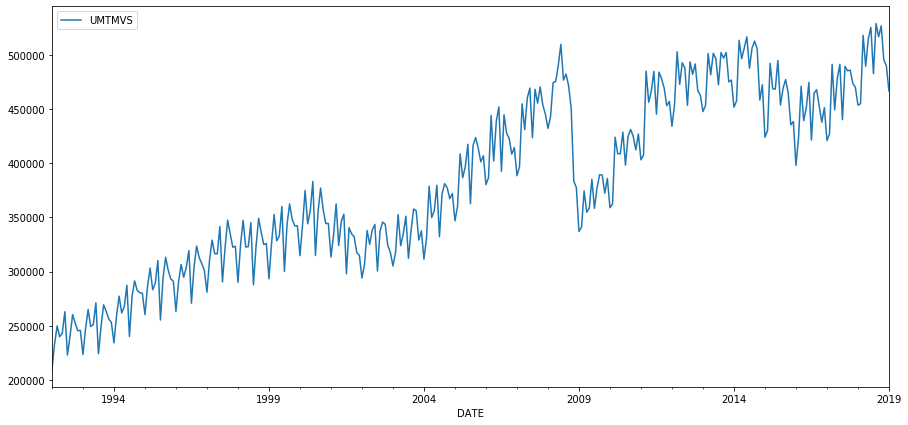

In [3]:
df.plot(figsize=(15,7))


In [4]:
# Percentage increase from 1st jan 2009 to 1st jan 2019

In [5]:
(df.loc['2019-1-1'] - df.loc['2009-1-1']) / df.loc['2009-1-1'] *100

UMTMVS    38.472149
dtype: float64

In [6]:
# Percentage descrease from 1st jan 2009 to 1st jan 2008

In [7]:
(df.loc['2009-1-1'] - df.loc['2008-1-1']) / df.loc['2008-1-1'] *100

UMTMVS   -22.022775
dtype: float64

In [8]:
df.loc['2006':].idxmin()

# What is the month with the least value after 2005? 

UMTMVS   2009-01-01
dtype: datetime64[ns]

In [9]:
# What 6 months have the highest value?

df.sort_values('UMTMVS', ascending=False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


In [10]:
df.loc['2008'].head(1).values - df.loc['2009'].head(1).values

# How many millions of dollars in value was lost in 2008? 
# (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)

array([[95206.]])

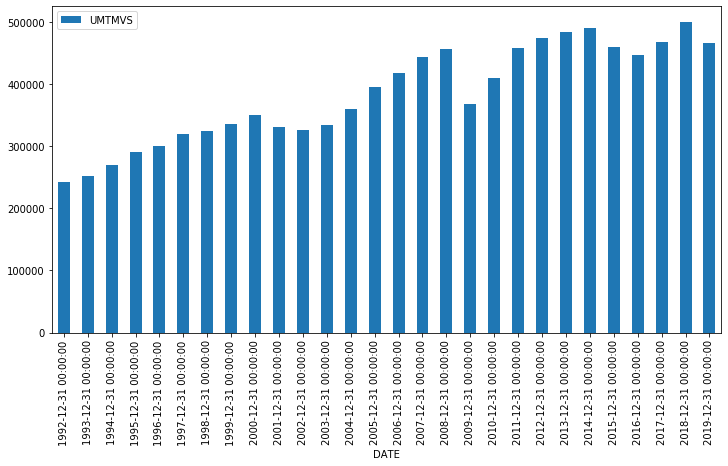

In [11]:
df.resample(rule='Y').mean().plot.bar(figsize=(12,6));

# Create a bar plot showing the average value in millions of dollars per year

In [12]:
(df.resample(rule='Y').mean() - df.resample(rule='Y').mean().shift(1)).idxmax()

# What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)

UMTMVS   2011-12-31
dtype: datetime64[ns]

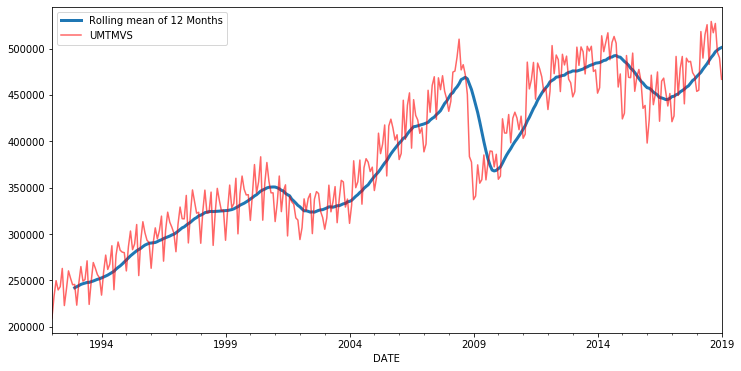

In [13]:
plt.figure(figsize=(12,6))
df['UMTMVS'].rolling(12).mean().plot(lw='3', label='Rolling mean of 12 Months')
df['UMTMVS'].plot(color='red', alpha=0.6, Label='UMTMVS')
plt.autoscale(axis='x', tight=True)
plt.legend()

# Plot out the yearly rolling mean on top of the original data. 
# Recall that this is monthly data and there are 12 months in a year!

In [14]:
# BONUS QUESTION (HARD).

# Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. 
# NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. 
# Refer to the video solutions for full explanation on this.

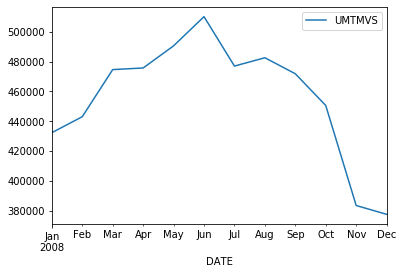

In [15]:
df.loc['2008'].plot()

In [16]:
min_ = df.loc['2008'].idxmax().values[0]
print(min_)
print()
min_value = df.loc['2008'].max().values[0]

2008-06-01T00:00:00.000000000



In [17]:
max_ = df[df['UMTMVS'] > min_value].loc['2008':].index[0]
print(max_)

2014-03-01 00:00:00


In [18]:
((max_ - min_)/np.timedelta64(1,'M'))

68.96240169202653

In [19]:
len(df.loc[min_:max_])

70